In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('records_100.csv')
df.head()

,Agent_Number,Time,bits_disagreement,Current_Knowledge_State,Current,alpha,Next,Next_Knowledge_State,Proportion,Parameter
0,0,99,[0.8 0.8 0.8 0.8 0.7 0.8],"[0, 0, 0, 0, 0, 0]",0,0.0,0,"[0, 0, 0, 0, 0, 0]",0.0,0.0
1,1,99,[0.3 0.3 0.3 0.3 0.3 0.3],"[1, 1, 1, 1, 1, 1]",63,0.0,63,"[1, 1, 1, 1, 1, 1]",0.0,0.0
2,2,99,[0.4 0.4 0.4 0.4 0.4 0.4],"[1, 1, 1, 1, 1, 1]",63,0.0,63,"[1, 1, 1, 1, 1, 1]",0.0,0.0
3,3,99,[0.6 0.6 0.6 0.6 0.6 0.6],"[0, 0, 0, 0, 0, 0]",0,0.0,0,"[0, 0, 0, 0, 0, 0]",0.0,0.0
4,4,99,[0.4 0.4 0.4 0.4 0.4 0.4],"[1, 1, 1, 1, 1, 1]",63,0.0,63,"[1, 1, 1, 1, 1, 1]",0.0,0.0


In [3]:
num_agents = 100

In [4]:
y_axis_labels = np.arange(0, 1, 0.1)
y_axis_labels

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

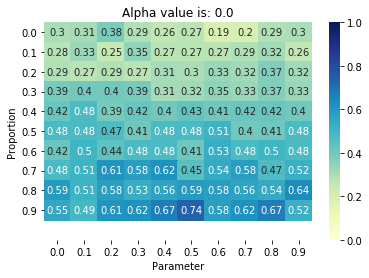

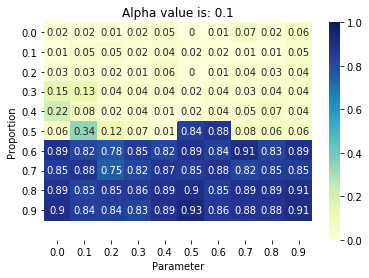

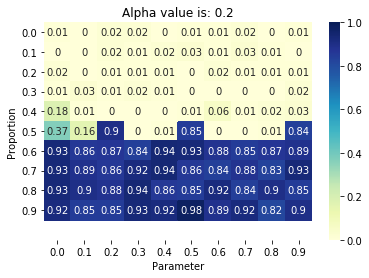

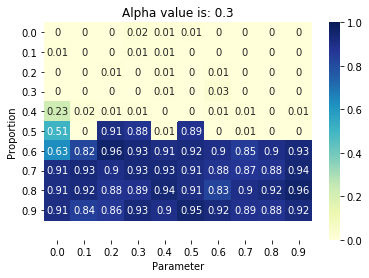

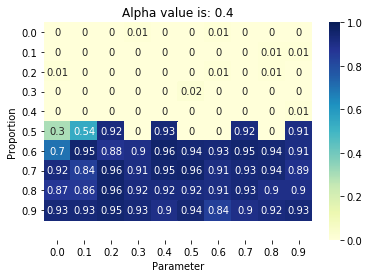

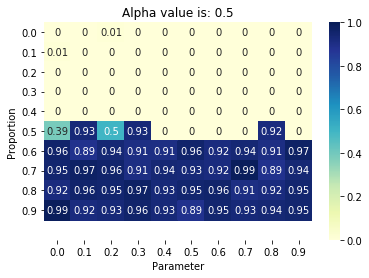

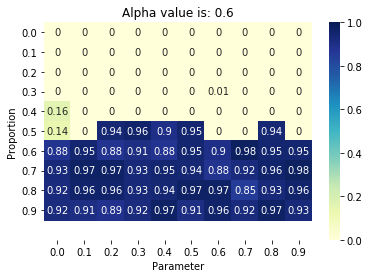

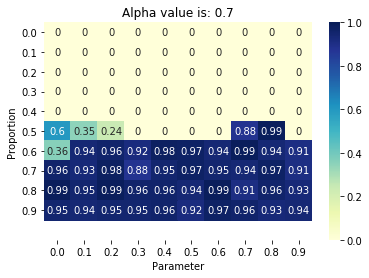

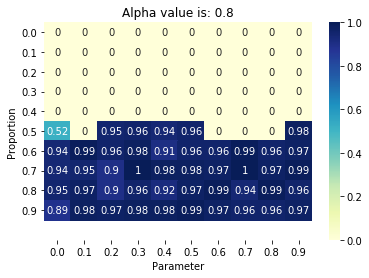

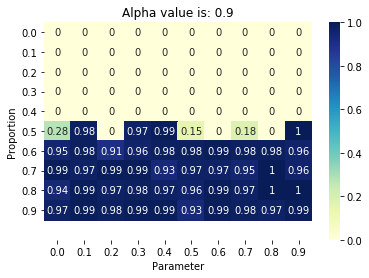

<Figure size 432x288 with 0 Axes>

In [70]:
tmp_df =  df[df['Current']==0]
alpha_values = tmp_df['alpha'].unique()
network_parameters = np.arange(0, 1, 0.1).round(2)
proportion_parameters = np.arange(0, 1, 0.1).round(2)

for a in alpha_values:
    heat_df = round(tmp_df[tmp_df['alpha']==a][['Agent_Number', 'Proportion', 'Parameter']],2)

#     heat_df['Knowledge'] = heat_df['Current_Knowledge_State'].apply(lambda row: ''.join([str(i) for i in row]))
#     heat_df.sort_values(by='Knowledge', inplace=True)
    grouped_df = heat_df.groupby(['Proportion', 'Parameter']).size().fillna(0).to_frame('Count').unstack(fill_value=0).stack().reset_index()
#     grouped_df.drop('Current_Knowledge_State', inplace=True, axis=1)
    grouped_df['Count'] = grouped_df['Count'].apply(lambda row: round(row/num_agents, 2))

    for i in proportion_parameters:
            for j in network_parameters:
                if (i not in grouped_df['Proportion'].unique()) or (j not in grouped_df['Parameter'].unique()):
                    grouped_df = grouped_df.append({'Proportion':i, 'Parameter':j, 'Count':0}, ignore_index=True)
                    break
    
    heatmap_df = grouped_df.pivot(index='Proportion', columns='Parameter', values='Count').fillna(0)

    
    sns.heatmap(heatmap_df, annot=True, vmin=0, vmax=1, cmap="YlGnBu")
    plt.yticks(rotation=0) ;
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 1.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.title('Alpha value is: {}'.format(a))

    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.figure()

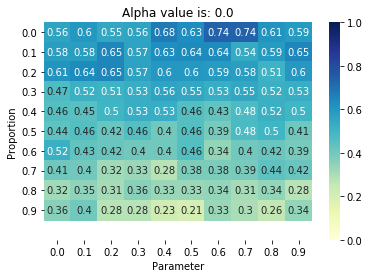

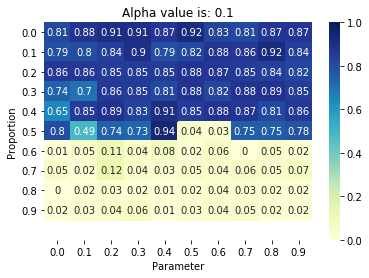

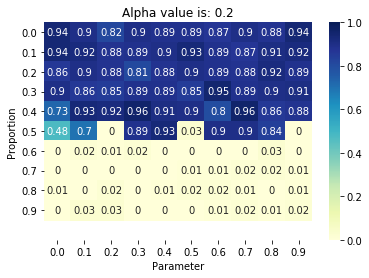

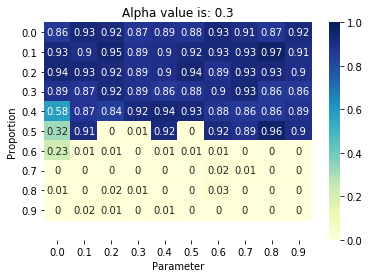

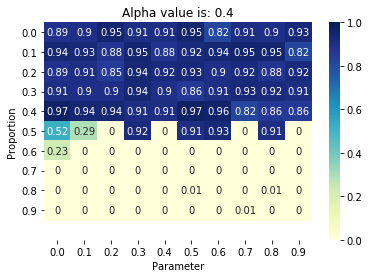

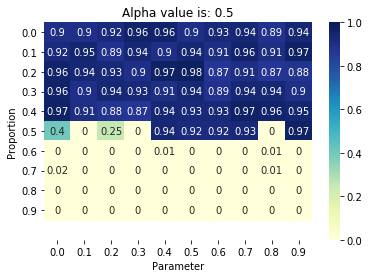

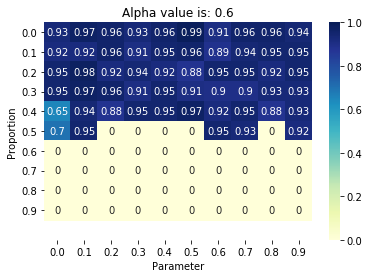

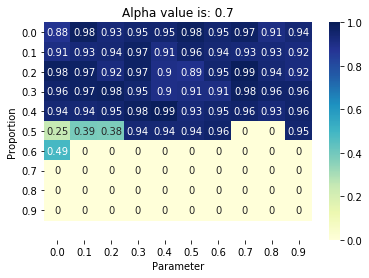

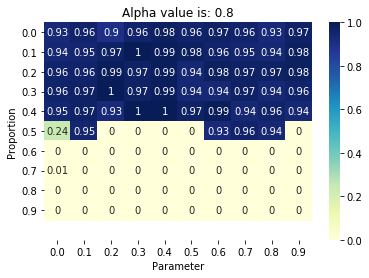

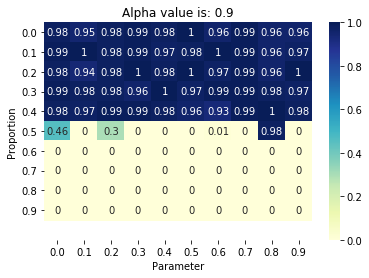

<Figure size 432x288 with 0 Axes>

In [69]:
tmp_df =  df[df['Current']==63]
alpha_values = tmp_df['alpha'].unique()
network_parameters = np.arange(0, 1, 0.1).round(2)
proportion_parameters = np.arange(0, 1, 0.1).round(2)

for a in alpha_values:
    heat_df = round(tmp_df[tmp_df['alpha']==a][['Agent_Number', 'Proportion', 'Parameter']],2)

#     heat_df['Knowledge'] = heat_df['Current_Knowledge_State'].apply(lambda row: ''.join([str(i) for i in row]))
#     heat_df.sort_values(by='Knowledge', inplace=True)
    grouped_df = heat_df.groupby(['Proportion', 'Parameter']).size().fillna(0).to_frame('Count').unstack(fill_value=0).stack().reset_index()
#     grouped_df.drop('Current_Knowledge_State', inplace=True, axis=1)
    grouped_df['Count'] = grouped_df['Count'].apply(lambda row: round(row/num_agents, 2))

    for i in proportion_parameters:
            for j in network_parameters:
                if (i not in grouped_df['Proportion'].unique()) or (j not in grouped_df['Parameter'].unique()):
                    grouped_df = grouped_df.append({'Proportion':i, 'Parameter':j, 'Count':0}, ignore_index=True)
                    break
    
    heatmap_df = grouped_df.pivot(index='Proportion', columns='Parameter', values='Count').fillna(0)

    
    sns.heatmap(heatmap_df,annot=True, vmin=0, vmax=1, cmap="YlGnBu")
    plt.yticks(rotation=0) ;
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 1.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.title('Alpha value is: {}'.format(a))

    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.figure()